# Import libraries

In [2]:
import numpy as np # multi-dimensional container of data
import json

from sklearn.datasets import load_iris, load_digits, load_diabetes # datasets
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer # scikit-learn transformers
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Support Vector Classifier
from pprint import pprint # beautiful print

import matplotlib.pyplot as plt # show images
import seaborn as sns

from IPython.display import Markdown, display
from IPython.core.interactiveshell import InteractiveShell

# Notebook Settings

In [3]:
InteractiveShell.ast_node_interactivity = "last_expr" # allow multiple cell output

In [4]:
with open('../../resources/questions_1.json') as json_file:
    questions = json.load(json_file)
    
with open('../../resources/answers_1.json') as json_file:
    answers = json.load(json_file)

In [5]:
def printmd(string: str):
    display(Markdown(string))

# Data Loader

In [6]:
iris = load_iris()
digits = load_digits()
diabetes = load_diabetes()

In [7]:
# pprint(iris)

In [8]:
# pprint(digits)

In [9]:
# pprint(diabetes)

In [10]:
iris_X = iris.data
iris_y = iris.target

digits_X = digits.data
digits_y = digits.target

diabetes_X = diabetes.data
diabetes_y = diabetes.target

## Datasets

Scikit-learn deals with learning information from one or more datasets that are represented as **2D arrays**. They can be understood as a list of multi-dimensional observations. We say that the first axis of these arrays is the **samples** axis, while the second is the **features** axis.

### 1. Iris
The iris dataset is made of **150 observations of irises**, each described by **4 features**: their sepal and petal length and width. </br>
The iris target is the **flower specie**.

In [11]:
iris_X.shape
iris_y.shape

(150,)

In [12]:
iris_X[0]
iris_y[0]

0

In [13]:
iris_X[:6]
iris_y[:6]

array([0, 0, 0, 0, 0, 0])

### 2. Digits
The digits dataset is made of **1797 8x8 (64 features) images** of hand-written digits. </br>
The target is the **digit**.

In [14]:
digits_X.shape
digits_y.shape

(1797,)

In [15]:
digits_X[42]
digits_y[42]

1

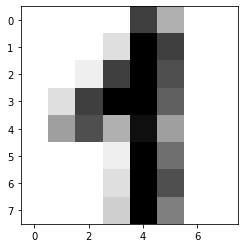

In [16]:
plt.imshow(digits.images[42], cmap=plt.cm.gray_r);

### 3. Diabetes
The diabetes dataset is made of **442 observations of diabetes patients**, each described by **10 features**: their age, their sex, their body mass index, their average blood pressur and six blood serum measurements. </br>
The diabete target is the quantitative measure of **disease progression** one year after baseline.

In [17]:
diabetes_X.shape
diabetes_y.shape

(442,)

# Estimators
**Fitting data**: the main API implemented by scikit-learn is that of the `estimator`. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a `fit` method that takes a dataset (`X`, usually a 2-d array)

# Supervised Learning
**Supervised learning** consists in learning the link between 2 datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length `n_samples`.

All supervised **estimators** in scikit-learn implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a **classification** task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a **regression** task.

## Classification

The classification task is the fact to classify the observations in a set of finite labels, in other words to “name” the objects observed

**Binary** classification is the task of classifying the elements of a given set into 2 groups (predicting which group each one belongs to).
- *True* or *False*
- <u>Medical testing</u>: determine if a patient has certain *disease* or *not*
- <u>Email spam filtering</u>: determine if an email is a *spam* or *not*

**Multiclass** classification is the task of classifying instances into one of three or more classes.
- <u>Handwriting digit recognition</u>: determine if a digit is *1*, *2*, *3*, *4*, *5*, *6*, *7*, *8*, *9* or *0*
- <u>Image recognition</u>: determine if a fruit is a *banana*, an *apple*, an *orange* or a *lemon*

**Multilabel** classification is the task of classifying instances into classes where each label represents a different classification task, but the tasks are somehow related.
- <u>Movies genres</u>: a same movie can be a *Action*, *Adventure*, & *Fantasy* movie

To unify how to process `y` you can use simple sklearn transformers:
`LabelBinarizer` & `MultiLabelBinarizer`

**Warning**: You will discover by yourself, that models performances can differ depending on this choice.</br>
So, it's not a rule, but an indication

In [18]:
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1], [-1, 5]]
y = ['neighbors', 'not neighbors', 'neighbors', 'neighbors', 'not neighbors', 'unknown']

In [19]:
y

['neighbors',
 'not neighbors',
 'neighbors',
 'neighbors',
 'not neighbors',
 'unknown']

In [20]:
clf = OneVsRestClassifier(estimator=SVC())
clf.fit(X, y);

In [21]:
clf.predict(X)

array(['neighbors', 'neighbors', 'neighbors', 'neighbors', 'neighbors',
       'unknown'], dtype='<U13')

In [22]:
binarized_y = LabelBinarizer().fit_transform(y)

In [23]:
y
binarized_y

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [24]:
binarized_clf = OneVsRestClassifier(estimator=SVC())
binarized_clf.fit(X, binarized_y);

In [25]:
binarized_clf.predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

--------------------------------------------------------------------------------------------------

In [26]:
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4], [5]]

In [27]:
binarized_y = MultiLabelBinarizer().fit_transform(y)

In [28]:
y
binarized_y

array([[1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [29]:
binarized_clf = OneVsRestClassifier(estimator=SVC())
binarized_clf.fit(X, binarized_y);

In [30]:
binarized_clf.predict(X)

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

### 1. Iris

In [31]:
np.unique(iris_y)

array([0, 1, 2])

In [32]:
iris_X.shape

(150, 4)

In [33]:
pprint(iris_X[:5])
pprint(iris_y)
pprint(iris.target_names[iris.target])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 's

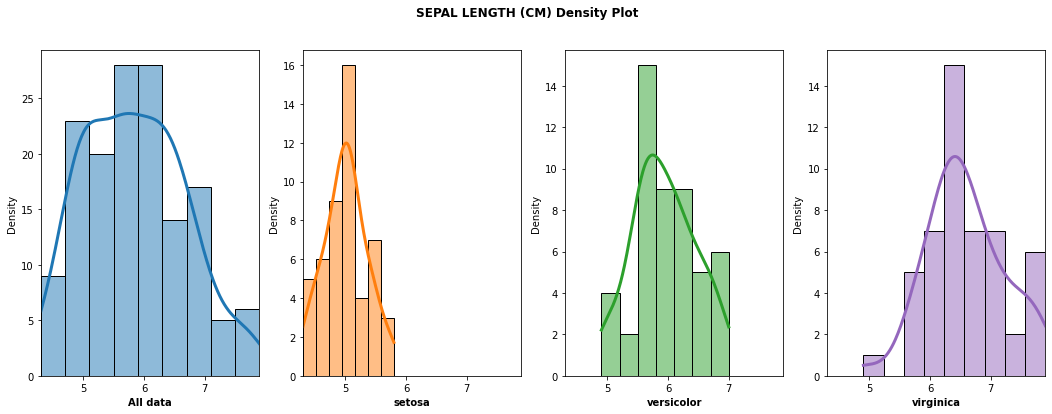

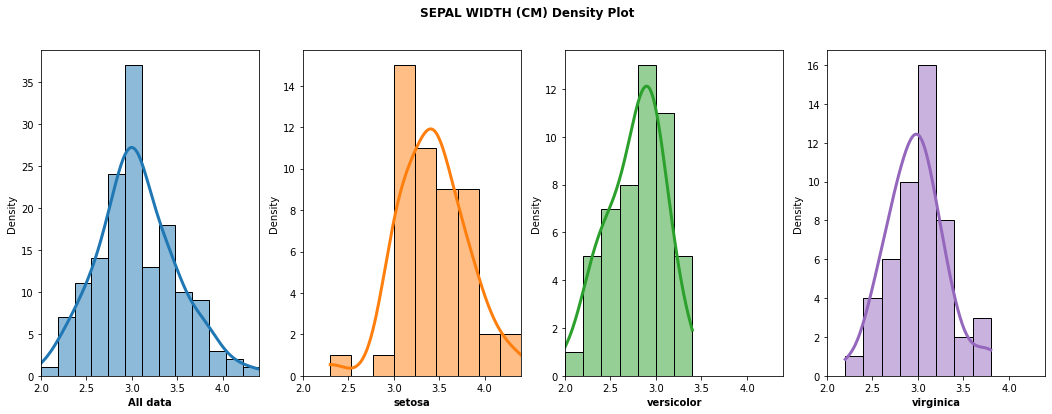

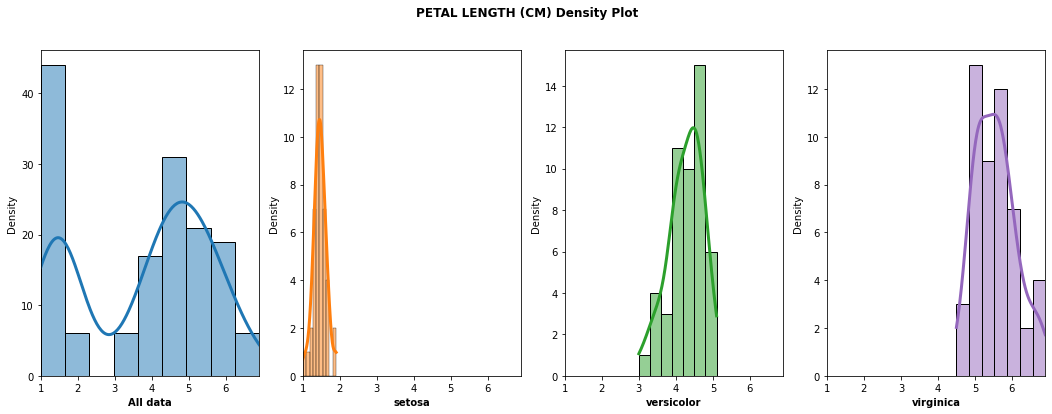

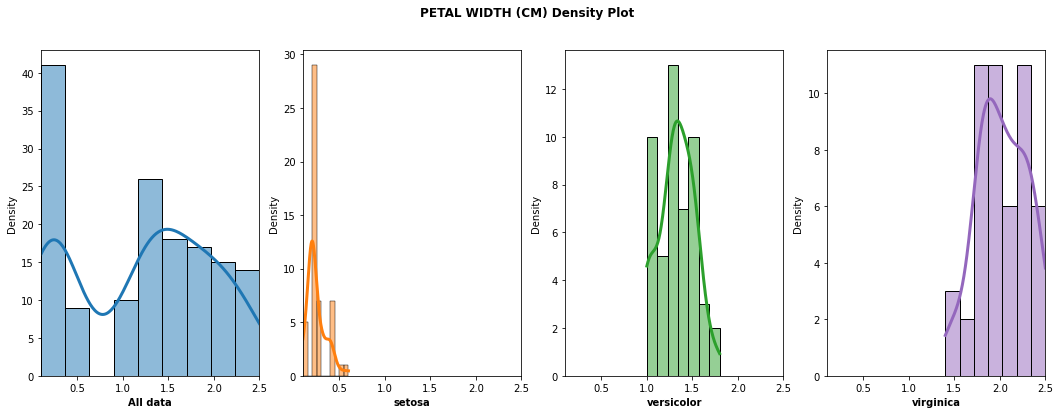

In [34]:
colors = {1: "tab:orange", 2: "tab:green", 3: "tab:purple"}

for feature, feature_name in zip(iris_X.transpose(), iris.feature_names):
    fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharex=True)
    sns.histplot(feature, kde = True, line_kws = {'linewidth': 3}, ax=axs[0])
    axs[0].set_xlabel("All data", fontweight='bold')
    axs[0].set_ylabel('Density')
    axs[0].set_xlim(feature.transpose().min(), 
                    feature.transpose().max())
    for y, i in zip(np.unique(iris_y), range(1, len(np.unique(iris_y))+1)):
        sns.histplot(feature[iris_y == y], kde = True, line_kws = {'linewidth': 3}, ax=axs[i], color=colors[i])
        axs[i].set_xlabel(np.unique(iris.target_names[iris.target])[i - 1], fontweight='bold')
        axs[i].set_ylabel('Density')
        
    plt.suptitle(f'{feature_name.upper()} Density Plot', fontweight='bold')
    # plt.xlabel(f'{feature_name.upper()}')

### 1.0 Questions

In [35]:
printmd(questions["LEARNING_0"])

**What type of learning problem is it ?**

In [36]:
printmd(answers["IRIS_LEARNING_0"])

It's a **Supervised learning** problem, we have a target value which is the flower specie.

In [37]:
printmd(questions["LEARNING_1"])

**What type of supervised learning is it ?**

In [38]:
printmd(answers["IRIS_LEARNING_1"])

It's a **Classification** problem, we have to predict the class of unlabeled data. It's a discrete problem.

In [39]:
printmd(questions["LEARNING_2"])

**What type of classification is it ?**

In [40]:
printmd(answers["IRIS_LEARNING_2"])

It's a **Multiclass classification** problem, we have more than 2 labels: *setosa*, *versicolor*, *virginica*.

In [41]:
printmd(questions["FEATURES"])
printmd(questions["SAMPLES"])

**How many features are used for this problem ?**

**How many samples are used for this problem ?**

In [42]:
printmd(answers["IRIS_FEATURES"])
printmd(answers["IRIS_SAMPLES"])

We have **4** features: *sepal length*, *sepal width*, *petal length*, *petal width*.

We have **150** samples: 150 flowers with observed target are used for this ML experiment.

### 1.1 Preprocessing

As I said previously, we prefer to use binarized labels as target.  
Then, we have to use `LabelBinarizer` because we are in a single label (but multiclass) problem.

*Remainder*:  
**Binary/Multiclass** classification: `LabelBinarizer`  
**Multilabel** classification: `MultiLabelBinarizer`

In [43]:
binarizer = LabelBinarizer()
iris_y = binarizer.fit_transform(iris_y)

In [44]:
iris_y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In **Supervised Learning**, our objective is to learn on labelled data (data with **observed features**, `X`, and **observed target**, `y`), to generalized this knowledge later on (data with **observed features**, `X`, but **unknown target**, `y`). </br>
To have an idea of the quality of what we are doing, we choose to split our dataset in 2: a **training** part and a **test** part. </br>
Then, we will train our model only on the training part, and **evaluate** the model on the test part.

In [45]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [46]:
iris_X_train.shape
iris_y_train.shape

iris_X_test.shape
iris_y_test.shape

(30, 3)

### 1.2 Training

Now, we can **train an algorithm on our training data**...

In [47]:
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

... and **predict on our test data**...

In [48]:
knn.predict(iris_X_test)

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [49]:
iris_y_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

... to **evaluate the accuracy** of our classifier.

In [50]:
pprint(f"Accuracy: {knn.score(iris_X_test, iris_y_test) * 100}%")

'Accuracy: 100.0%'


### 2. Handwritten digits

In [51]:
np.unique(digits_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
digits_y

array([0, 1, 2, ..., 8, 9, 8])

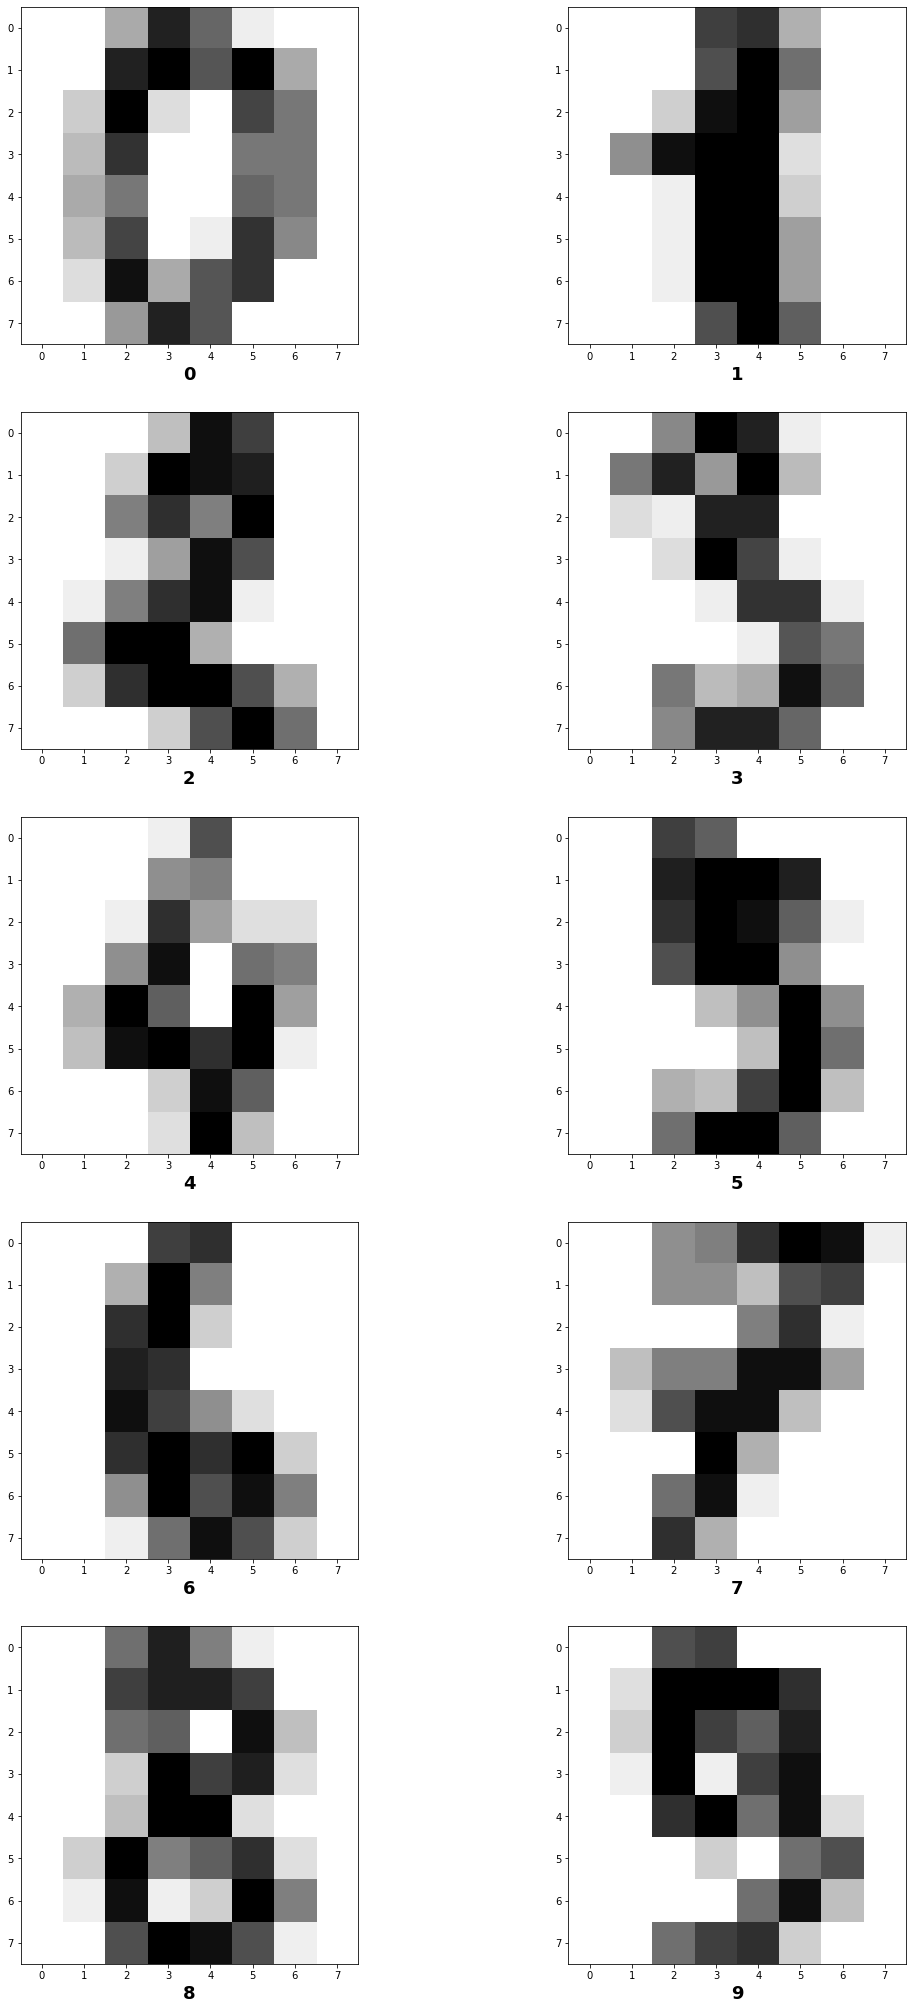

In [53]:
fig, axs = plt.subplots(5, 2, figsize=(18, 36))
for i, ax in zip(np.unique(digits_y)[::2], axs):
    for ii in range(2):
        ax[ii].imshow(digits.images[digits_y == (i + ii)][0], cmap=plt.cm.gray_r)
        ax[ii].set_xlabel(i + ii, fontweight='bold', fontsize=18)
plt.show()

In [54]:
digits_X.shape

(1797, 64)

In [55]:
pprint(digits_X[:5])
pprint(digits_y)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

### 2.0 Questions

In [56]:
printmd(questions["LEARNING_0"])

**What type of learning problem is it ?**

In [57]:
printmd(answers["DIGITS_LEARNING_0"])

It's a **Supervised learning** problem, we have a target value which is the digit.

In [58]:
printmd(questions["LEARNING_1"])

**What type of supervised learning is it ?**

In [59]:
printmd(answers["DIGITS_LEARNING_1"])

It's a **Classification** problem, we have to predict the class of unlabeled data. It's a discrete problem.

In [60]:
printmd(questions["LEARNING_2"])

**What type of classification is it ?**

In [61]:
printmd(answers["DIGITS_LEARNING_2"])

It's a **Multiclass classification** problem, we have more than 2 labels: *1*, *2*, ..., *9*, *0*.

In [62]:
printmd(questions["FEATURES"])
printmd(questions["SAMPLES"])

**How many features are used for this problem ?**

**How many samples are used for this problem ?**

In [63]:
printmd(answers["DIGITS_FEATURES"])
printmd(answers["DIGITS_SAMPLES"])

We have **64** features: *8x8 image* where each feature is the grey scale intensity of a pixel.

We have **1797** samples: 1797 digits with observed target are used for this ML experiment.

### 2.1 Preprocessing

In [64]:
binarizer = LabelBinarizer()
digits_y = binarizer.fit_transform(digits_y)

In [65]:
digits_y[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [66]:
digits_X_train, digits_X_test, digits_y_train, digits_y_test = train_test_split(digits_X, digits_y, test_size=0.2, random_state=42)

In [67]:
digits_X_train.shape
digits_y_train.shape

digits_X_test.shape
digits_y_test.shape

(360, 10)

### 2.2 Training

In [68]:
knn = KNeighborsClassifier()
knn.fit(digits_X_train, digits_y_train)

KNeighborsClassifier()

In [69]:
pprint(f"Accuracy: {round(knn.score(digits_X_test, digits_y_test) * 100, 2)}%")

'Accuracy: 98.61%'


## Regression

The regression task is the fact to predict a continuous target variable.

### 3. Diabetes

In [70]:
diabetes_y.shape

(442,)

In [71]:
pprint(diabetes_X[:5])
pprint(diabetes_y[:5])

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])
array([151.,  75., 141., 206., 135.])


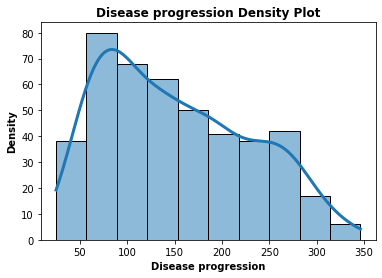

In [72]:
sns.histplot(diabetes_y, kde=True, line_kws = {'linewidth': 3})
    
# Plot formatting
plt.title('Disease progression Density Plot', fontweight='bold')
plt.xlabel('Disease progression', fontweight='bold')
plt.ylabel('Density', fontweight='bold');

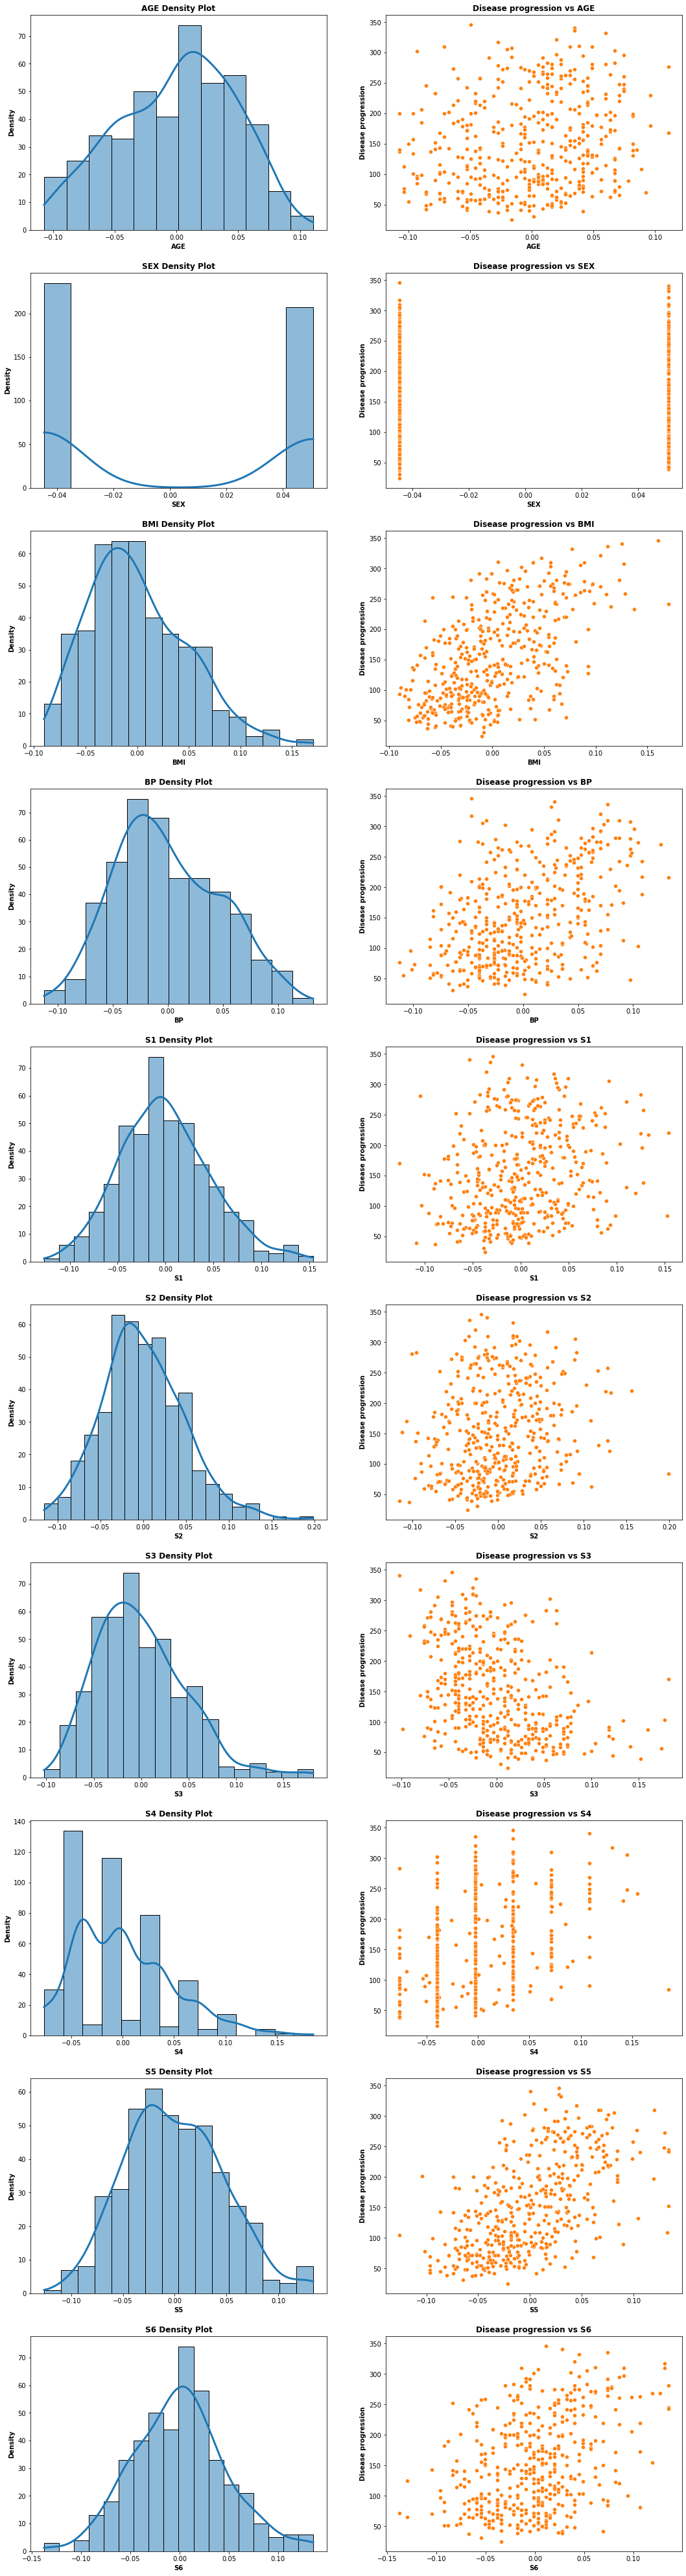

In [73]:
fig, axs = plt.subplots(10, 2, figsize=(18, 72))
for feature, feature_name, ax in zip(diabetes_X.transpose(), diabetes.feature_names, axs):
    sns.histplot(feature, kde=True, line_kws = {'linewidth': 3}, ax=ax[0])
    sns.scatterplot(x=feature, y=diabetes_y, ax=ax[1], color="tab:orange")
    
    # Plot formatting
    ax[0].set_title(f'{feature_name.upper()} Density Plot', fontweight='bold')
    ax[0].set_xlabel(f'{feature_name.upper()}', fontweight='bold')
    ax[0].set_ylabel('Density', fontweight='bold')
    
    ax[1].set_title(f'Disease progression vs {feature_name.upper()}', fontweight='bold')
    ax[1].set_xlabel(f'{feature_name.upper()}', fontweight='bold')
    ax[1].set_ylabel('Disease progression', fontweight='bold')

In [74]:
diabetes_y.shape

(442,)

### 3.0 Questions

In [77]:
printmd(questions["LEARNING_0"])

**What type of learning problem is it ?**

In [78]:
printmd(answers["DIABETES_LEARNING_0"])

It's a **Supervised learning** problem, we have a target value which is the disease progression.

In [79]:
printmd(questions["LEARNING_1"])

**What type of supervised learning is it ?**

In [80]:
printmd(answers["DIABETES_LEARNING_1"])

It's a **Regression** problem, we have to predict a quantity of unlabeled data. It's a continuous problem.

In [81]:
printmd(questions["FEATURES"])
printmd(questions["SAMPLES"])

**How many features are used for this problem ?**

**How many samples are used for this problem ?**

In [82]:
printmd(answers["DIABETES_FEATURES"])
printmd(answers["DIABETES_SAMPLES"])

We have **10** features: *age*, *sex*, *body mass index*, *average blood pressur* and 6 *blood serum measurements*.

We have **442** samples: 442 diabetes patients with observed target are used for this ML experiment.

### 3.1 Preprocessing

In [83]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

In [84]:
diabetes_X_train.shape
diabetes_y_train.shape

diabetes_X_test.shape
diabetes_y_test.shape

(89,)

### 3.2 Training

In [85]:
lr = LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [86]:
pprint(f"Mean Squared Error: {round(lr.score(diabetes_X_test, diabetes_y_test), 3)}")

'Mean Squared Error: 0.453'
